In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
class neural_net:
    
    def __init__(self,x,y,struct,activ,epoch,lr=0.01):
        self.layers=len(struct)
        self.struct=struct
        self.activ=activ
        self.x=x
        self.y=y
        self.param=self.evaluate(epoch,lr)

    def gen_network(self):
        param={}
        for i in range(self.layers):
            if i==0:a,b=self.struct[i],self.x.shape[0]
            else:a,b=self.struct[i],self.struct[i-1]
            param[f'w{i+1}']=np.random.randn(a,b)
            param[f'b{i+1}']=np.random.randn(a,1)
        return param

    def activate(self,z,func,d=False,alpha=0.01):
        if func=='s':
            if not d: return 1/(1+np.exp(-z))
            else:     return z*(1-z)
        elif func=='t':
            if not d: return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
            else:     return 1-z**2
        elif func=='r':
            if not d: return np.maximum(0,z)
            else:     return np.int64(z>0)
        elif func=='lr':
            if not d: return np.maximum(0.01*z,z)
            else:     return np.where(z>0,1,alpha)
            
    def forward(self,param):
        fwd={}
        for i in range(self.layers):
            if i==0:
                fwd[f'z{i+1}']=np.dot(param['w1'],self.x)+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=(fwd[f'z{i+1}']),func=self.activ[i]) 
            else:
                fwd[f'z{i+1}']=np.dot(param[f'w{i+1}'],fwd[f'a{i}'])+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=fwd[f'z{i+1}'],func=self.activ[i]) 
        return fwd

    def back(self,fwd,param):
        delta={}
        for i in range(self.layers,0,-1):
            if i==self.layers:
                delta[f'dz{i}']=fwd[f'a{i}']-self.y
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.x.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.x.shape[1]
            elif i==1:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[self.layers-i-1],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],self.x.T)/self.x.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.x.shape[1]
            else:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[self.layers-i-1],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.x.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.x.shape[1]
        return delta

    def update(self,param,delta,lr):
        for i in param:
            param[i]-=lr*delta[f'd{i}']
        return param
    
    def cost(self,yh,n):
        m = self.y.shape[1]
        try:
            logp = np.multiply(self.y,np.log(yh))+np.multiply((1-self.y),np.log(1-yh))
            cost = np.sum(-logp)/m
        except Exception as e:
            print(n,e)
        cost=float(np.squeeze(cost))
        return cost
    
    def evaluate(self,epoch,lr,cost_out=True):  
        param=self.gen_network()
        cost=[]
        for i in range(epoch):
            fwd=self.forward(param=param)
            cost.append(self.cost(fwd[f'a{len(self.struct)}'],i))
            delta=self.back(fwd,param)
            param=self.update(param,delta,lr)
        if cost_out:
            plt.plot(cost)
        return param

In [27]:
np.random.seed(1)
x=np.random.randn(5,6)
y=np.int64(np.random.randn(1,6)>0)

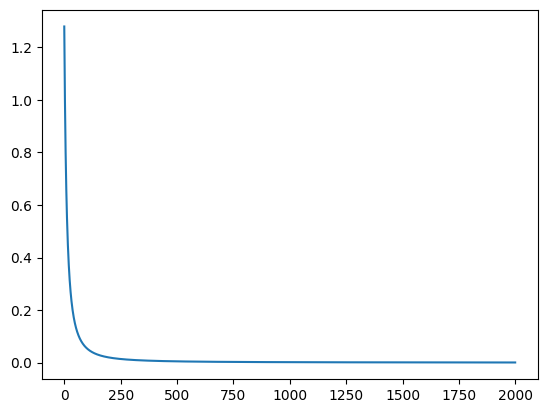

In [28]:
nn=neural_net(x,y,[4,3,2,1],['r','r','lr','s'],2000,0.01)

In [29]:
nn.param

{'w1': array([[-1.11707533,  0.23143224,  1.65635816,  0.74805727, -0.19445965],
        [-0.93488757, -0.75536304,  1.67761973,  0.0689048 , -0.67180875],
        [ 0.18451631,  2.13833618,  0.1663524 ,  0.57716454,  0.29734682],
        [-0.47446044, -1.17261192, -0.39028847, -0.15829347,  0.4961536 ]]),
 'b1': array([[0.84397649],
        [0.98731398],
        [0.34661462],
        [1.03186196]]),
 'w2': array([[-0.70757373,  1.30404322,  0.53078684, -0.26295119],
        [ 0.64512999,  0.09558766,  1.19114366,  1.63743314],
        [ 2.16166344, -1.42132607, -1.44602905, -0.51859658]]),
 'b2': array([[0.19145205],
        [0.98121905],
        [0.30189061]]),
 'w3': array([[-2.02220122, -0.30620401,  0.82797464],
        [ 0.35403214,  1.2111149 , -0.16417784]]),
 'b3': array([[-0.20075807],
        [ 0.29355327]]),
 'w4': array([[ 0.42058282, -1.01846733]]),
 'b4': array([[-0.16604326]])}